In [115]:
import pandas as pd
import numpy as np

Here, I have created on my own data.
To convert a downloaded data into CSV format the syntax is ---
data,to_csv('filename_to_be_converted',index=False) 

In [116]:
dat={'ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Area (sqft)': [1200, 800, np.nan, 1500, 650, 2200, 5000, 700],
    'Bedrooms': [2, 1, 3, 3, 1, 4, 5, 1],
    'Bathrooms': [1, np.nan, 2, np.nan, 1, 3, 4, 1],
    'Rent ($)': [1500, 1100, np.nan, 1800, 900, 3500, 8500, np.nan],
    'Furnishing': ['Furnished', 'Unfurnished', 'Semi-Furnished', 'Unfurnished', np.nan, 'Furnished', 'Furnished', 'Unfurnished'],
    'Location': ['Downtown', 'Suburbs', 'Uptown', 'Downtown', 'Suburbs', 'Uptown', 'Downtown', 'Suburbs'],
    'Floor': ['3rd', '2nd', 'Ground', '5th', '1st', '8th', '10th', '2nd'],
    'Parking': [1, 0, 2, 2, 0, 2, 3, 0],
    'Pet-Friendly': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
    'Balcony': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'Nearby School Distance (km)': [0.5, 1.2, 2.5, np.nan, 0.8, 3.0, 0.3, 1.0]
}
data=pd.DataFrame(dat)
print(data)

    ID  Area (sqft)  Bedrooms  Bathrooms  Rent ($)      Furnishing  Location  \
0  101       1200.0         2        1.0    1500.0       Furnished  Downtown   
1  102        800.0         1        NaN    1100.0     Unfurnished   Suburbs   
2  103          NaN         3        2.0       NaN  Semi-Furnished    Uptown   
3  104       1500.0         3        NaN    1800.0     Unfurnished  Downtown   
4  105        650.0         1        1.0     900.0             NaN   Suburbs   
5  106       2200.0         4        3.0    3500.0       Furnished    Uptown   
6  107       5000.0         5        4.0    8500.0       Furnished  Downtown   
7  108        700.0         1        1.0       NaN     Unfurnished   Suburbs   

    Floor  Parking Pet-Friendly Balcony  Nearby School Distance (km)  
0     3rd        1          Yes     Yes                          0.5  
1     2nd        0           No      No                          1.2  
2  Ground        2          Yes     Yes                          2

FILLING NAN VALUES

In [117]:
print(data.isna().sum())

ID                             0
Area (sqft)                    1
Bedrooms                       0
Bathrooms                      2
Rent ($)                       2
Furnishing                     1
Location                       0
Floor                          0
Parking                        0
Pet-Friendly                   0
Balcony                        0
Nearby School Distance (km)    1
dtype: int64


In [118]:

# Fill NaNs in all columns except 'Rent' with their mode
columns_to_fill = data.columns.difference(['Rent ($)'])  # Exclude 'Rent'
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mode().iloc[0])


In [ ]:
print(data['Rent ($)'].isna().sum())

In [ ]:
from sklearn.linear_model import LinearRegression
train_data=data[data['Rent ($)'].notnull()]                 #data imputation
test_data=data[data['Rent ($)'].isnull()]       
features=['Bedrooms','Bathrooms','Furnishing']
x_train=train_data[features]
y_train=train_data['Rent ($)']
model=LinearRegression()
model.fit(x_train,y_train)
x_test=test_data[features]
predict_val=model.predict(x_test)
data.loc[data['Rent ($)'].isnull(),'Rent ($)']=predict_val

Encoding

In [119]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[['Furnished','Semi-Furnished','Unfurnished']])
data[['Furnishing']]=encoder.fit_transform(data[['Furnishing']])

In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
colums=['Floor','Pet-Friendly', 'Balcony']
for col in colums:
    data[col]=le.fit_transform(data[col])

SCALING

In [124]:
from sklearn.preprocessing import RobustScaler  #SCALING RENT AMOUNTS
scale=RobustScaler()
data['Rent_scale']=scale.fit_transform(data[['Rent ($)']])
print(data['Rent_scale'])

0   -0.067111
1   -0.246073
2    0.758944
3    0.067111
4   -0.335554
5    0.827700
6    3.064726
7   -0.216465
Name: Rent_scale, dtype: float64


In [125]:
print(data['Rent_scale'])

0   -0.067111
1   -0.246073
2    0.758944
3    0.067111
4   -0.335554
5    0.827700
6    3.064726
7   -0.216465
Name: Rent_scale, dtype: float64


In [126]:
from sklearn.preprocessing import MinMaxScaler #scaling
scaler=MinMaxScaler()
sca_col=['Area (sqft)','Nearby School Distance (km)']
normali=pd.DataFrame(scaler.fit_transform(data[sca_col]),columns=sca_col)
print(normali)

   Area (sqft)  Nearby School Distance (km)
0     0.126437                     0.074074
1     0.034483                     0.333333
2     0.000000                     0.814815
3     0.195402                     0.000000
4     0.000000                     0.185185
5     0.356322                     1.000000
6     1.000000                     0.000000
7     0.011494                     0.259259


In [127]:
data['Parking_available']=(data['Parking']>1).astype(int)
print(data['Parking_available'])

0    0
1    0
2    1
3    1
4    0
5    1
6    1
7    0
Name: Parking_available, dtype: int32


VISUALISING AND REMOVING OUTLIERS

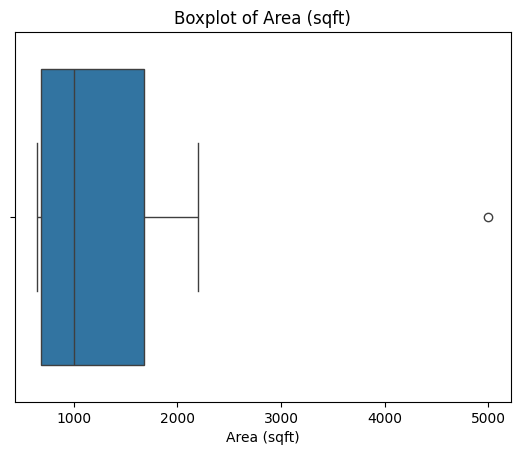

In [128]:
import seaborn as sns   #VISUALISING OUTLIERS
import matplotlib.pyplot as plt

sns.boxplot(x=data['Area (sqft)'])
plt.title('Boxplot of Area (sqft)')
plt.show()


In [129]:
Q1 = data['Area (sqft)'].quantile(0.25)
Q3 = data['Area (sqft)'].quantile(0.75)     #REMOVING THE OUTLIERS
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
data = data[(data['Area (sqft)'] >= lower_bound) & (data['Area (sqft)'] <= upper_bound)]
